# Sentence Transformer

* How many dimensions are needed to explain a sentence?

## A picture is worth a thousand words.

In 61 BC, there was one general Zhao (赵充国) who, when discussing with Emperor Xuan how to crush a rebellion by the Qiang people, told the Emperor:

"Seeing once is better than hearing about the matter a hundred times. As judging military matters from afar is difficult, I'll go to the Qiang region and submit a battle plan from there for your approval"

## Graphical user interface has icons
![](https://atlasiko.com/asserts/blog/what-size-should-a-favicon.jpg.webp)



In [1]:
16*16*3

768

https://huggingface.co/nomic-ai/nomic-embed-text-v1.5

In [2]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)
sentences = ['Prof Low is cool']
embeddings = model.encode(sentences)
print(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/103k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/547M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

[[ 5.55306263e-02  2.41549872e-02 -1.53074218e-02 -4.32220288e-02
  -2.06910316e-02  3.44397575e-02  5.33467624e-03 -1.80543549e-02
  -3.01117804e-02 -3.12655047e-02 -1.04598077e-02  8.89618844e-02
   7.01648882e-03 -6.62487820e-02 -7.27405958e-03 -4.13387865e-02
   2.88035534e-03 -7.03693926e-02 -2.99665071e-02 -2.90738493e-02
  -4.39110734e-02 -1.23232808e-02 -2.31808759e-02 -1.69442054e-02
   1.14589311e-01 -1.78537220e-02 -7.54469121e-03  1.29109593e-02
  -2.80602966e-02  2.56373286e-02  4.29961830e-03 -4.08999287e-02
   1.95977874e-02  3.57515253e-02  5.63575374e-03 -2.01651622e-02
   2.92699672e-02  7.27903424e-03  2.99761747e-03  7.17661381e-02
   2.97574587e-02 -3.67336124e-02  7.53462268e-03 -3.36899422e-02
  -1.29434215e-02  2.49294061e-02  1.08226724e-02  4.95461561e-03
  -3.02087306e-03 -2.23291181e-02 -5.24083748e-02 -5.63813113e-02
  -5.48942946e-02 -1.06210364e-02 -1.12563688e-02 -7.61633459e-03
  -1.06290160e-02  8.54005106e-04  3.24369371e-02 -8.02539941e-03
   2.82469

In [3]:
embeddings.shape

(1, 768)

## Simple Q&A Chatbot


In [4]:

sentences = {
    # Queries
    "Close Account Query": "How do I close my account?",
    "Interest Rate Query": "What is the interest rate for savings accounts?",
    "Password Reset Query": "How can I reset my online banking password?",
    "Account Number Query": "Where can I find my account number?",
    "Wire Fees Query": "What are the fees for international wire transfers?",
    # Responses
    "Close Account Response": "To close your account, you have to download the Account Closure form, fill it, and upload it to the Secure Web Portal.",
    "Interest Rate Response": "The current interest rate for savings accounts is 1.5% per annum.",
    "Password Reset Response": "To reset your online banking password, click on 'Forgot Password' on the login page, and follow the instructions.",
    "Account Number Response": "Your account number is available on your bank statement or under the account details section in your online banking profile.",
    "Wire Fees Response": "The fee for international wire transfers is $30 per transaction."
}

# Generate embeddings
embeddings = model.encode(list(sentences.values()))

In [5]:
from scipy.spatial import distance

query = 'I want to close my account. How do I do that?'
query_em = model.encode(query)

pairwise_cosine_distances = distance.squareform(distance.pdist(np.vstack([query_em,embeddings[5:]]), 'cosine'))
pairwise_cosine_distances


array([[0.        , 0.2591151 , 0.57956629, 0.47537249, 0.52068847,
        0.66271637],
       [0.2591151 , 0.        , 0.55951544, 0.42965346, 0.47518412,
        0.64180806],
       [0.57956629, 0.55951544, 0.        , 0.5614132 , 0.53043324,
        0.57459033],
       [0.47537249, 0.42965346, 0.5614132 , 0.        , 0.35973909,
        0.65454024],
       [0.52068847, 0.47518412, 0.53043324, 0.35973909, 0.        ,
        0.69471744],
       [0.66271637, 0.64180806, 0.57459033, 0.65454024, 0.69471744,
        0.        ]])

In [6]:
pd.Series(pairwise_cosine_distances[0,:],index=[query]+list(sentences.values())[5:]).sort_values()

,0
I want to close my account. How do I do that?,0.000000
"To close your account, you have to download the Account Closure form, fill it, and upload it to the Secure Web Portal.",0.259115
"To reset your online banking password, click on 'Forgot Password' on the login page, and follow the instructions.",0.475372
Your account number is available on your bank statement or under the account details section in your online banking profile.,0.520688
The current interest rate for savings accounts is 1.5% per annum.,0.579566
The fee for international wire transfers is $30 per transaction.,0.662716


In [7]:
query = 'what is the charge to send my mom money in Singapore?'
query_em = model.encode(query)

pairwise_cosine_distances = distance.squareform(distance.pdist(np.vstack([query_em,embeddings[5:]]), 'cosine'))
pd.Series(pairwise_cosine_distances[0,:],index=[query]+list(sentences.values())[5:]).sort_values()


,0
what is the charge to send my mom money in Singapore?,0.000000
The fee for international wire transfers is $30 per transaction.,0.520610
The current interest rate for savings accounts is 1.5% per annum.,0.590634
"To close your account, you have to download the Account Closure form, fill it, and upload it to the Secure Web Portal.",0.616094
"To reset your online banking password, click on 'Forgot Password' on the login page, and follow the instructions.",0.634382
Your account number is available on your bank statement or under the account details section in your online banking profile.,0.662777


# Principal Component Analysis (PCA)

#### What PCA Calculates:

1. **New Axes (Principal Components)**:
   - PCA finds new directions (axes) in the data that capture the most variation. These new axes are the principal components.

2. **Variance and Directions**:
   - PCA calculates how much the data varies along these new axes and identifies the directions that best explain this variance.

3. **Data Transformation**:
   - The original data is rotated and scaled to align with these new axes, making it easier to analyze the most important patterns.

#### How PCA Can Be Used:

1. **Dimensionality Reduction**:
   - PCA simplifies complex data by reducing the number of dimensions while keeping most of the important information.

2. **Feature Selection**:
   - PCA helps highlight the most important features in the data, which can improve the performance of machine learning models.

3. **Noise Filtering**:
   - By focusing on the main components, PCA can reduce noise and make the data cleaner and easier to interpret.

### Additional Details:

- **Eigenvectors**:
  - These are the new axes (directions) found by PCA. They show the directions of maximum variance in the data.

- **Semantic Meaning**:
  - While PCA finds directions of variance, these directions might not always correspond to intuitive concepts like happy/sad. They are mathematical directions that best capture the spread of the data.

### Sources:
- [Wikipedia - Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png)

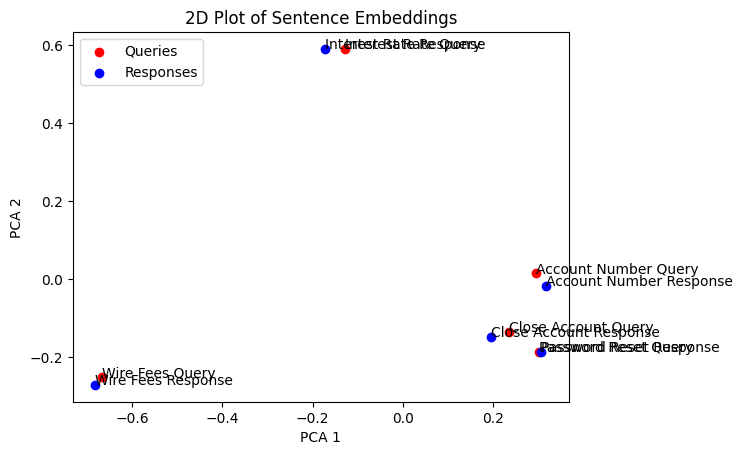

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

# 2D plot
fig = plt.figure()

# Scatter plot
x, y = embeddings_reduced[:,0], embeddings_reduced[:,1]
plt.scatter(x[:5], y[:5],color='red', label='Queries') # Queries in red
plt.scatter(x[5:], y[5:],color='blue', label='Responses') # Responses in blue

# Label the points
for i, sentence in enumerate(sentences):
    plt.text(x[i], y[i], sentence)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D Plot of Sentence Embeddings')
plt.legend() # Show legend to distinguish Queries and Responses
plt.show()


#KMeans

K-means clustering
* widely used unsupervised machine learning algorithms
* forms clusters of data where the distance of data instances within each cluster is small.
* K = number of clusters is a hyperparameter. i.e. it has to be predefined by user.

Algorithm:
1. Randomly choose a centroid value for each cluster.
2. Repeat until convergence:
  1. Calculate the Euclidean distance between each data instance and centroids of all the clusters;
  2. Assign each instance to the nearest cluster centroid
  3. For each cluster, calculate new centroid values based on as the mean of the data instances in the previous step.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

# Case Study - Organizing random articles

An editor tasked with organizing a collection of diverse submitted texts, much like the examples provided above.

## Unsupervised Learning - K-Means

One might turn to an supervised machine learning approach called kMeans to streamline the process. By employing kMeans, the editor can cluster the submissions based on their thematic similarities, thus facilitating a more efficient and structured organization of content. This method allows the editor to group texts with similar themes, whether they're humorous anecdotes, serious discussions, or informative pieces, into coherent clusters.

In [9]:
teen_smoking_discussion = [
    "Smoking among teenagers is a critical public health issue that has seen various trends over the years. Initially driven by social factors and the perceived image of smoking as a 'cool' and 'adult-like' behavior, many teens start smoking to fit in or to experiment. However, the addictive nature of nicotine quickly turns occasional smoking into a habit. This early onset of tobacco use can lead to long-term health issues, including increased risk for heart disease, lung cancer, and stroke in later years.",
    "The influence of peer pressure cannot be overstated when it comes to teenage smoking. Adolescents are at a stage in their life where they are highly susceptible to external influences, especially from their peers. When friends or popular individuals in a teenager’s social circle smoke, it significantly increases the likelihood that the teenager will also start smoking. This behavior is further reinforced if smoking is perceived as a way to gain acceptance or respect among peers.",
    "In recent years, the advent of electronic cigarettes and vaping has altered the landscape of teenage smoking. Initially marketed as a safer alternative to traditional cigarettes, these devices have become increasingly popular among young people. Unfortunately, many teenagers are unaware that e-cigarettes also contain nicotine and can be just as addictive. This new trend is alarming because it's introducing a new generation to nicotine dependency, potentially leading to traditional smoking habits.",
    "The role of family and education in preventing teenage smoking is crucial. Teenagers who grow up in households where smoking is prevalent are more likely to start smoking themselves. Conversely, families and schools that educate young people about the dangers of smoking can significantly reduce the likelihood of them picking up the habit. Open communication about the health risks associated with smoking and providing support systems for teens to resist peer pressure are key strategies in preventing teenage smoking.",
    "Addressing the problem of smoking in teenagers requires a multifaceted approach. Public health campaigns that target the youth and highlight the long-term health risks can be effective. Furthermore, policies restricting the advertising and availability of tobacco products to minors have shown to be beneficial. Lastly, support for teens who wish to quit smoking, including counseling and access to cessation programs, is essential for tackling the issue at both individual and community levels.",
    "One concerning aspect of teenage smoking is the 'gateway effect.' It suggests that teenagers who start smoking may be more likely to experiment with other substances, including illicit drugs. This pattern of substance use can have far-reaching consequences on a teenager's physical and mental health, underscoring the importance of early intervention and prevention.",
    "Tobacco companies have a long history of marketing strategies that target young people. Colorful packaging, flavored cigarettes, and appealing advertisements have all been designed to attract the attention of teenagers. These tactics contribute to the allure of smoking among adolescents and highlight the need for stricter regulations on tobacco marketing.",
    "It's essential to recognize that the impact of teenage smoking extends beyond health concerns. Academic performance can suffer as a result of smoking, with nicotine addiction potentially leading to decreased focus and motivation. Schools and educators play a pivotal role in educating students about the consequences of smoking on their overall well-being and future prospects.",
    "Preventing teenage smoking requires a community-wide effort. Local governments, schools, parents, and healthcare professionals must collaborate to create an environment where smoking is discouraged and resources for prevention and cessation are readily available. Empowering teenagers with knowledge and support is key to breaking the cycle of teenage smoking and its associated health risks.",
]


In [10]:
dangers_of_drunk_driving = [
    "Drunk driving remains a major public health concern due to its high potential for causing accidents, injuries, and fatalities. When individuals drive under the influence of alcohol, their judgment, reaction time, and motor coordination are significantly impaired. This impairment drastically increases the risk of collisions as drivers are less able to respond to traffic signals, other vehicles, and unexpected road conditions. Even small amounts of alcohol can affect driving ability, making drunk driving a dangerous choice regardless of the amount consumed.",
    "One of the most tragic aspects of drunk driving is its tendency to result in fatal accidents, often involving innocent people. Alcohol-impaired drivers are not only a danger to themselves but also to other road users including passengers, pedestrians, and cyclists. Fatalities in drunk-driving incidents are particularly devastating as they could have been entirely prevented. Families and communities are often left dealing with the long-term emotional and psychological impacts of these senseless tragedies.",
    "Aside from the immediate physical dangers, drunk driving carries severe legal consequences. Individuals caught driving under the influence can face penalties such as hefty fines, license suspension, and even imprisonment. The legal repercussions of a DUI (driving under the influence) conviction can also extend beyond the courtroom, affecting a person’s employment opportunities, insurance rates, and personal reputation. This legal framework aims to deter drunk driving and underscore the severity of its consequences.",
    "Alcohol impairs cognitive functions and decision-making abilities, leading to riskier behaviors while driving. Drunk drivers are more likely to engage in reckless driving behaviors such as speeding, ignoring traffic signals, and aggressive driving. These actions further compound the risks associated with drunk driving, increasing the likelihood of causing serious or fatal accidents. The inability to make safe and sound decisions while under the influence makes drunk driving an extremely hazardous behavior.",
    "The societal impact of drunk driving is immense, accounting for a significant portion of healthcare costs, property damage, and law enforcement resources. Emergency services and hospitals are often strained by the aftermath of accidents caused by drunk driving. Additionally, the economic burden of these incidents is borne by society at large, including costs related to emergency response, medical care, legal proceedings, and lost productivity.",
    "Prevention and education are key in combating the dangers of drunk driving. Awareness campaigns and educational programs, especially targeted at young drivers, can help inculcate the understanding of risks associated with alcohol-impaired driving. Furthermore, initiatives such as designated driver programs, readily available public transportation options, and the use of breathalyzer-based ignition interlocks in vehicles can significantly reduce the incidence of drunk driving and save lives.",
    "Drunk driving often leads to long-lasting physical and emotional consequences for survivors of accidents. Injured victims may suffer from severe injuries, disabilities, and chronic pain, while their families must cope with the emotional trauma and the financial burden of medical bills and ongoing care. The ripple effects of drunk driving extend far beyond the initial incident.",
    "It's crucial to emphasize that drunk driving is entirely preventable. Individuals have various alternatives to getting behind the wheel after consuming alcohol. They can use rideshare services, call a taxi, rely on public transportation, or designate a sober driver in their group. These responsible choices not only protect their own lives but also contribute to safer roads for everyone.",
    "Repeat offenders pose a significant challenge in the fight against drunk driving. Some individuals continue to drive under the influence despite prior DUI convictions. Effective measures such as mandatory rehabilitation programs, ignition interlock devices, and stricter penalties for multiple offenses are essential to deter repeat offenders and protect the public.",
    "Communities play a vital role in curbing drunk driving incidents. Local organizations, law enforcement agencies, and advocacy groups can collaborate to organize awareness campaigns, sobriety checkpoints, and educational events. By working together, communities can foster a culture of responsible alcohol consumption and discourage the dangerous practice of drunk driving.",
]


In [11]:
apple_vs_android_debate = [
    "When it comes to choosing between Apple and Android mobiles, one of the primary considerations is the operating system. Apple's iOS is known for its intuitive interface, regular updates, and seamless integration with other Apple products like MacBooks, iPads, and the Apple Watch. This ecosystem creates a unified experience for users who own multiple Apple devices. In contrast, Android offers a more customizable experience. Its open-source nature allows users to tailor their devices to their specific needs and preferences, which appeals to those who value flexibility and personalization.",
    "In terms of hardware, Apple's iPhones are renowned for their build quality, sophisticated design, and powerful performance. Apple tightly controls the manufacturing process, ensuring high standards for their devices. However, this often comes with a higher price tag. Android phones, on the other hand, are available in a wider range of models from various manufacturers like Samsung, Google, and OnePlus. This variety means consumers can find devices at multiple price points, with different features and form factors, catering to a broader audience.",
    "The app ecosystem is another crucial factor in the Apple vs Android debate. The Apple App Store is known for its strict app vetting process, often resulting in higher quality and more secure applications. Conversely, the Google Play Store offers a larger variety of apps due to its less stringent approval process, which can be a double-edged sword, offering more variety but potentially less vetted app security. Users' preference for app quality or variety can significantly influence their choice between Apple and Android.",
    "Privacy and security are increasingly important for mobile users. Apple has a strong reputation for prioritizing user privacy and security, with strict data usage policies and regular security updates. Android, while also secure, faces challenges due to its open nature and the fragmentation of its ecosystem, as different manufacturers may lag in providing updates. For users highly concerned with privacy and security, Apple might be the preferable choice.",
    "Integration with other devices and services plays a significant role in choosing a mobile ecosystem. Apple's ecosystem is designed to work seamlessly together, offering features like Handoff, where users can start a task on one device and continue on another. Android devices offer integration with Google's suite of services like Gmail, Google Drive, and Google Maps, and are generally more flexible in terms of compatibility with non-Google devices and services. This difference in integration can be a deciding factor for users who are heavily invested in either Apple's or Google's ecosystems.",
    "Finally, the choice between Apple and Android may come down to personal preference and brand loyalty. Some users prefer the familiarity and prestige associated with Apple products, while others appreciate the diversity and customization that Android offers. It's important to consider personal needs, budget, and which features are most important in a mobile device before making a decision.",
    "One notable difference in the Apple vs. Android debate is the longevity of software updates. Apple typically supports older devices with regular iOS updates for a more extended period, ensuring that users can enjoy the latest features and security patches even on older iPhones. In contrast, Android updates can vary depending on the manufacturer and model, potentially leaving some users with outdated software sooner. This longevity factor can influence the perceived value of each platform.",
    "The availability of accessories and peripherals is an essential consideration for some users. Apple's ecosystem offers a wide range of accessories, from cases and chargers to the popular AirPods and Apple Pencil. Android devices also have a variety of accessories, but the availability and compatibility may vary between manufacturers and models. Users who value a vast ecosystem of accessories may lean toward Apple for its extensive lineup.",
    "Another factor in the Apple vs. Android debate is the user interface and user experience. Apple's iOS is known for its simplicity, uniform design, and ease of use. This consistency appeals to users who prefer a straightforward and intuitive interface. Android, on the other hand, allows for more customization and flexibility in terms of home screen layouts, widgets, and app choices. Users who value a highly personalized interface may gravitate toward Android for its versatility.",
    "Environmental considerations are becoming increasingly important in consumer choices. Apple has made strides in its commitment to environmental sustainability, using recycled materials in its devices and transitioning to renewable energy sources for its operations. Android manufacturers also have their own environmental initiatives, but the sustainability practices can vary. For eco-conscious consumers, the environmental impact of their mobile device choice may be a deciding factor.",
]


In [12]:
joke_narrative = [
    "One day, a software engineer got a call from his bank. The banker said, 'Sir, we have noticed some suspicious activity on your account. We believe you may be the victim of identity theft.'",
    "The engineer, surprised and concerned, asked, 'Oh no! What makes you think that?'",
    "The banker replied, 'Well, there have been multiple purchases for things like luxury cars, designer clothes, and exotic holidays. All totally unlike your usual spending on electronics, books, and pizza delivery.'",
    "The engineer started laughing, which confused the banker. The banker asked, 'Sir, why are you laughing? This is a serious matter.'",
    "The engineer, trying to catch his breath, said, 'You think I'm a victim of identity theft? This is the best proof you could have given me that my identity is perfectly secure.'",
    "Puzzled, the banker asked, 'How can you possibly say that?'",
    "The engineer chuckled and said, 'Because no thief would ever spend money to lower their credit score, buy non-refundable warranties, and subscribe to every streaming service available! Only I would do such unique optimizations to my life.'",
    "Two atoms were talking to each other, and one said, 'I think I might have just lost an electron.' The other atom asked, 'Are you sure?' The first atom replied, 'Yes, I'm positive.'",
    "Why did the computer keep freezing during the winter? Because it had Windows!",
    "A group of biologists is studying a frog population. They notice that the male frogs are significantly louder than the females. After conducting some experiments, they discover the reason. The males have developed a unique vocal adaptation called 'ampli-frog' to help them croak louder. It turns out, it's not easy being green, but it's certainly loud!",
]


In [13]:
data = []
categories = ['Teen Smoking', 'Drunk Driving Dangers', 'Apple vs Android', 'Joke Narrative']

for i, category_list in enumerate([teen_smoking_discussion, dangers_of_drunk_driving, apple_vs_android_debate, joke_narrative]):
    for paragraph in category_list:
        data.append((paragraph, categories[i]))

# Create DataFrame
df = pd.DataFrame(data, columns=['Paragraph','Category'])
df

,Paragraph,Category
0,Smoking among teenagers is a critical public h...,Teen Smoking
1,The influence of peer pressure cannot be overs...,Teen Smoking
2,"In recent years, the advent of electronic ciga...",Teen Smoking
3,The role of family and education in preventing...,Teen Smoking
4,Addressing the problem of smoking in teenagers...,Teen Smoking
5,One concerning aspect of teenage smoking is th...,Teen Smoking
6,Tobacco companies have a long history of marke...,Teen Smoking
7,It's essential to recognize that the impact of...,Teen Smoking
8,Preventing teenage smoking requires a communit...,Teen Smoking
9,Drunk driving remains a major public health co...,Drunk Driving Dangers


In [14]:
df = df.sample(frac=1)
df # Oh no!

,Paragraph,Category
10,One of the most tragic aspects of drunk drivin...,Drunk Driving Dangers
21,The app ecosystem is another crucial factor in...,Apple vs Android
7,It's essential to recognize that the impact of...,Teen Smoking
14,Prevention and education are key in combating ...,Drunk Driving Dangers
13,The societal impact of drunk driving is immens...,Drunk Driving Dangers
34,"Puzzled, the banker asked, 'How can you possib...",Joke Narrative
1,The influence of peer pressure cannot be overs...,Teen Smoking
26,The availability of accessories and peripheral...,Apple vs Android
2,"In recent years, the advent of electronic ciga...",Teen Smoking
37,Why did the computer keep freezing during the ...,Joke Narrative


## Parameters vs Hyper-parameters

* Hyper-parameters -- set by the user
* Parameters -- set by model



## Silhouette Score

## Determining the Optimal Number of Clusters

The challenge with KMeans is determining the "right" number of clusters, k. Too few clusters might merge distinct groups, while too many might over-segment the data. To address this, the silhouette score is introduced as a measure of how similar an object is to its own cluster compared to other clusters.

## Understanding the Silhouette Score
The silhouette score ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters.

The silhouette score provides a succinct graphical representation of how well each object has been classified. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually.

This metric is used to determine the optimal k by running the KMeans clustering algorithm for a range of k values and computing the silhouette score for each. The value of k that has the highest average silhouette score is considered the optimal number for clustering.

1. Explain what K-Means and Silhouette Score is.
2. Using code "from sklearn.metrics import silhouette_score", determine the optimum k for your reduced embeddings data.


In [15]:
embeddings = model.encode(df.Paragraph.to_list())


In [16]:
pd.DataFrame(embeddings).shape

(39, 768)

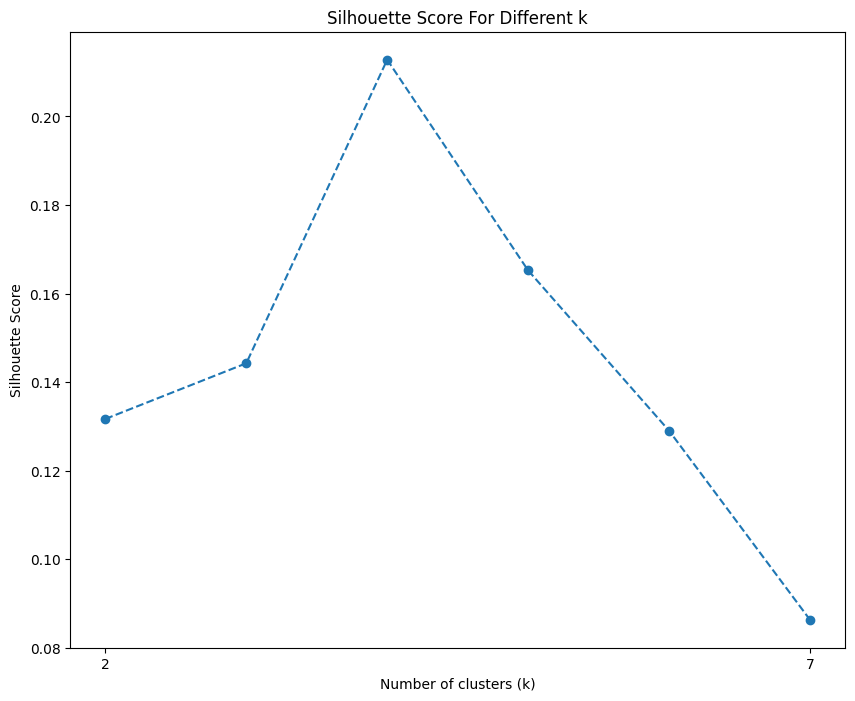

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(embeddings)



silhouette_scores = []
ks = range(2,8)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(standardized_embeddings)
    silhouette_avg = silhouette_score(standardized_embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(ks, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(ks), max(ks)+1, 5.0))
plt.show()



In [18]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(standardized_embeddings)
df['Predicted Cluster']=clusters
df.sort_values('Predicted Cluster')

,Paragraph,Category,Predicted Cluster
34,"Puzzled, the banker asked, 'How can you possib...",Joke Narrative,0
37,Why did the computer keep freezing during the ...,Joke Narrative,0
33,"The engineer, trying to catch his breath, said...",Joke Narrative,0
32,"The engineer started laughing, which confused ...",Joke Narrative,0
31,"The banker replied, 'Well, there have been mul...",Joke Narrative,0
35,"The engineer chuckled and said, 'Because no th...",Joke Narrative,0
29,"One day, a software engineer got a call from h...",Joke Narrative,0
30,"The engineer, surprised and concerned, asked, ...",Joke Narrative,0
36,"Two atoms were talking to each other, and one ...",Joke Narrative,0
38,A group of biologists is studying a frog popul...,Joke Narrative,0


In [19]:
# Misclassified!
df.loc[38]

,38
Paragraph,A group of biologists is studying a frog popul...
Category,Joke Narrative
Predicted Cluster,0


I'll fill in the gaps in your markdown for students, elaborating on the PCA and UMAP sections:

## The vastness of high dimensional space

* https://en.wikipedia.org/wiki/Volume_of_an_n-ball
* An inscribed circle takes up 79% of the square
* But 10-dimensional sphere takes up 0.2% of 10-dimensional cube!

## Solutions include:

* PCA (Principal Component Analysis)
  * Linear dimensionality reduction technique
  * Identifies directions (principal components) of maximum variance
  * Projects data onto lower-dimensional subspace while preserving as much variance as possible
  * Computationally efficient and deterministic (same result every time)
  * Works well when data has linear relationships
  * Preserves global structure at the expense of local structure
  * Less effective for highly non-linear data like text embeddings
  * Useful for feature selection and multicollinearity reduction

* UMAP (Uniform Manifold Approximation and Projection)
  * Non-linear dimensionality reduction technique
  * Constructs a high-dimensional graph representation and optimizes a low-dimensional embedding
  * Preserves both local and global structure of the data
  * Can handle highly complex, non-linear relationships
  * Typically produces more meaningful visualizations for text data
  * Computationally efficient compared to other non-linear methods (e.g., t-SNE)
  * Stochastic algorithm (results vary slightly between runs)
  * Parameters like `n_neighbors` and `min_dist` control the balance between local and global structure

## However...

* Sentence Transformers have already been optimized and do not need significant dimensionality reduction
* Experiment!
* Do not be surprised if dimensions are high versus other raw datasets.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pca = PCA().fit(embeddings)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)



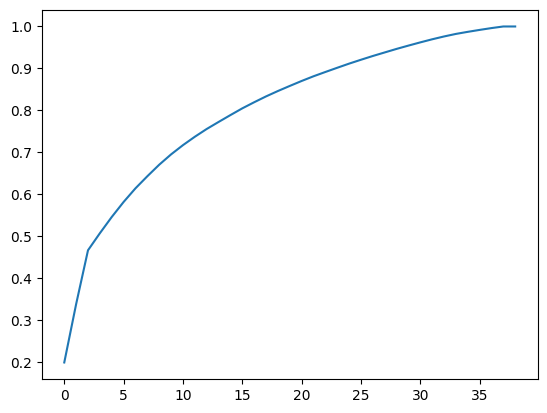

In [21]:
import matplotlib.pyplot as plt
# plt.plot(explained_variance)
plt.plot(cumulative_variance)

In [22]:
# Determine the right number of dimensions
# For example, say we want the cumulative variance to be around 75%
n_components = np.argmax(cumulative_variance >= 0.75) + 1
print(standardized_embeddings.shape[1],'->',n_components)

# Step 5: Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
reduced_embeddings = pca.fit_transform(standardized_embeddings)


768 -> 13


In [23]:
reduced_embeddings.shape

(39, 13)

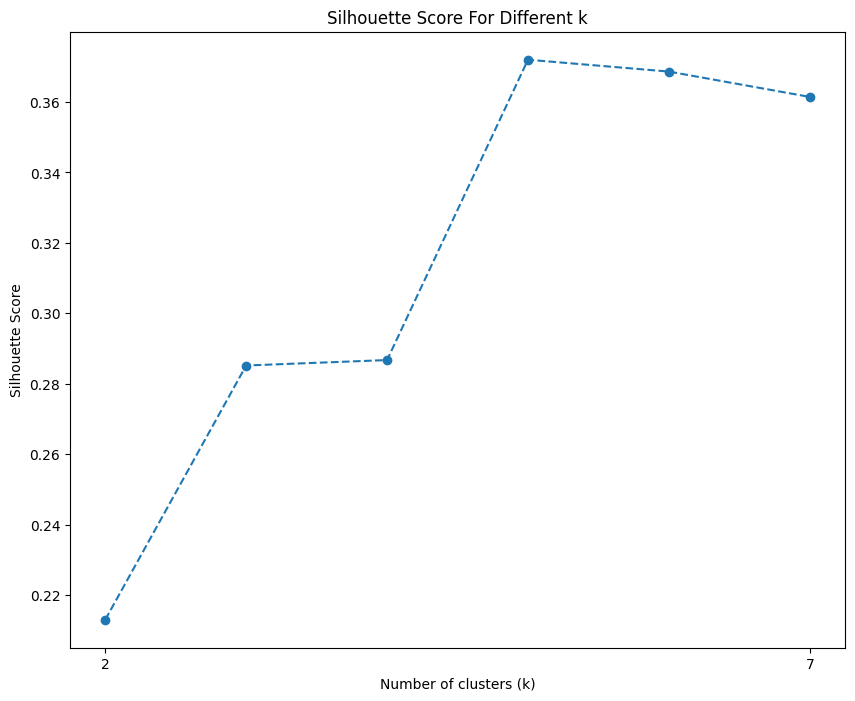

0.31451088


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

silhouette_scores = []
ks = range(2,8)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(reduced_embeddings)
    silhouette_avg = silhouette_score(reduced_embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(ks, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(ks), max(ks)+1, 5.0))
plt.show()

print(np.mean(silhouette_scores))


In [25]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)
df['Predicted Cluster']=clusters
df.sort_values('Predicted Cluster')

,Paragraph,Category,Predicted Cluster
33,"The engineer, trying to catch his breath, said...",Joke Narrative,0
37,Why did the computer keep freezing during the ...,Joke Narrative,0
29,"One day, a software engineer got a call from h...",Joke Narrative,0
30,"The engineer, surprised and concerned, asked, ...",Joke Narrative,0
35,"The engineer chuckled and said, 'Because no th...",Joke Narrative,0
32,"The engineer started laughing, which confused ...",Joke Narrative,0
36,"Two atoms were talking to each other, and one ...",Joke Narrative,0
38,A group of biologists is studying a frog popul...,Joke Narrative,0
28,Environmental considerations are becoming incr...,Apple vs Android,1
25,One notable difference in the Apple vs. Androi...,Apple vs Android,1


In [26]:
# Classified!
df.loc[38]

,38
Paragraph,A group of biologists is studying a frog popul...
Category,Joke Narrative
Predicted Cluster,0


# Queries to Banking Chatbot example

In [27]:
import pandas as pd

# Create a list of tuples containing (query, category)
banking_queries_with_categories = [
    # Account Access & Login
    ("How do I reset my password?", "Account Access & Login"),
    ("What should I do if I forgot my username?", "Account Access & Login"),
    ("Why am I getting locked out of my account?", "Account Access & Login"),
    ("How do I change my username?", "Account Access & Login"),
    ("What are the password requirements?", "Account Access & Login"),
    ("How do I recover my account if I'm locked out?", "Account Access & Login"),
    ("Why didn't I receive my security passcode?", "Account Access & Login"),
    ("How do I update my phone number for security codes?", "Account Access & Login"),
    ("Can I have multiple usernames for the same account?", "Account Access & Login"),
    ("What is multi-factor authentication?", "Account Access & Login"),
    ("How do I disable multi-factor authentication?", "Account Access & Login"),
    ("What browser works best with your online banking?", "Account Access & Login"),
    ("Is your mobile app compatible with my phone?", "Account Access & Login"),
    ("How do I download the mobile banking app?", "Account Access & Login"),
    ("Why can't I log in through the mobile app?", "Account Access & Login"),
    ("What should I do if I'm getting an error message during login?", "Account Access & Login"),
    ("How secure is your online banking platform?", "Account Access & Login"),
    ("How often should I change my password?", "Account Access & Login"),
    ("Can I use face recognition to login?", "Account Access & Login"),
    ("Does your app support fingerprint login?", "Account Access & Login"),

    # Account Management
    ("How do I open a new checking account?", "Account Management"),
    ("What documents do I need to open an account?", "Account Management"),
    ("Can I open an account online or do I need to visit a branch?", "Account Management"),
    ("How do I close my account?", "Account Management"),
    ("What's the difference between checking and savings accounts?", "Account Management"),
    ("How do I merge multiple accounts?", "Account Management"),
    ("Can I have a joint account with someone who isn't family?", "Account Management"),
    ("How do I add someone to my account?", "Account Management"),
    ("How do I remove someone from my account?", "Account Management"),
    ("What's the minimum balance requirement for my account?", "Account Management"),
    ("How do I upgrade my account type?", "Account Management"),
    ("Can I convert my individual account to a joint account?", "Account Management"),
    ("What happens to my account if I move to another state?", "Account Management"),
    ("How do I change the primary account holder?", "Account Management"),
    ("What identification do I need to access my account in person?", "Account Management"),
    ("Can I have different beneficiaries for different accounts?", "Account Management"),
    ("How do I designate a beneficiary for my account?", "Account Management"),
    ("What happens to my account if I die?", "Account Management"),
    ("How do I set up a trust account?", "Account Management"),
    ("Can I have accounts in different currencies?", "Account Management"),

    # Fees & Charges
    ("What are the monthly maintenance fees for my account?", "Fees & Charges"),
    ("How can I avoid monthly fees?", "Fees & Charges"),
    ("What's the fee for overdrafts?", "Fees & Charges"),
    ("Are there ATM fees?", "Fees & Charges"),
    ("How much do you charge for wire transfers?", "Fees & Charges"),
    ("Is there a fee for transferring between accounts?", "Fees & Charges"),
    ("What are the fees for stopping a payment?", "Fees & Charges"),
    ("Do you charge for paper statements?", "Fees & Charges"),
    ("How much does it cost to order checks?", "Fees & Charges"),
    ("What's the fee for cashier's checks?", "Fees & Charges"),
    ("Do you charge for notary services?", "Fees & Charges"),
    ("What's the foreign transaction fee?", "Fees & Charges"),
    ("Is there a fee for closing my account early?", "Fees & Charges"),
    ("What's the minimum balance fee?", "Fees & Charges"),
    ("Are there fees for excessive withdrawals from savings?", "Fees & Charges"),
    ("Do you charge for incoming wire transfers?", "Fees & Charges"),
    ("What are your international wire transfer fees?", "Fees & Charges"),
    ("Is there a fee for replacing a lost debit card?", "Fees & Charges"),
    ("Do you charge for account verification letters?", "Fees & Charges"),
    ("What's the fee for expedited card delivery?", "Fees & Charges"),

    # Deposits & Withdrawals
    ("How do I deposit a check using the mobile app?", "Deposits & Withdrawals"),
    ("What's the maximum amount I can deposit via mobile?", "Deposits & Withdrawals"),
    ("How long does it take for a deposit to clear?", "Deposits & Withdrawals"),
    ("Can I deposit cash through an ATM?", "Deposits & Withdrawals"),
    ("Where can I find your ATMs?", "Deposits & Withdrawals"),
    ("What's the ATM withdrawal limit?", "Deposits & Withdrawals"),
    ("Can I set a custom withdrawal limit?", "Deposits & Withdrawals"),
    ("How do I deposit cash into my account?", "Deposits & Withdrawals"),
    ("Do you accept third-party checks?", "Deposits & Withdrawals"),
    ("What's the hold period for large check deposits?", "Deposits & Withdrawals"),
    ("Can I deposit checks at any branch?", "Deposits & Withdrawals"),
    ("How do I deposit a foreign check?", "Deposits & Withdrawals"),
    ("What's the cut-off time for same-day deposits?", "Deposits & Withdrawals"),
    ("Can I withdraw large amounts of cash without prior notice?", "Deposits & Withdrawals"),
    ("How do I set up direct deposit?", "Deposits & Withdrawals"),
    ("What's my routing number?", "Deposits & Withdrawals"),
    ("Where can I find my account number?", "Deposits & Withdrawals"),
    ("Can I withdraw money from my savings more than six times a month?", "Deposits & Withdrawals"),
    ("How do I deposit to someone else's account?", "Deposits & Withdrawals"),
    ("What should I do if an ATM doesn't give me the right amount?", "Deposits & Withdrawals"),

    # Transfers & Payments
    ("How do I transfer money between my accounts?", "Transfers & Payments"),
    ("Can I schedule recurring transfers?", "Transfers & Payments"),
    ("How do I transfer money to someone else's account?", "Transfers & Payments"),
    ("What is Zelle and how do I use it?", "Transfers & Payments"),
    ("How long do transfers take to process?", "Transfers & Payments"),
    ("Is there a limit on how much I can transfer?", "Transfers & Payments"),
    ("How do I set up automatic payments?", "Transfers & Payments"),
    ("Can I cancel a scheduled transfer?", "Transfers & Payments"),
    ("How do I make an international wire transfer?", "Transfers & Payments"),
    ("What information do I need for a wire transfer?", "Transfers & Payments"),
    ("Can I transfer money to accounts at other banks?", "Transfers & Payments"),
    ("How do I verify that my transfer was completed?", "Transfers & Payments"),
    ("What's the cut-off time for same-day transfers?", "Transfers & Payments"),
    ("How do I pay my credit card bill?", "Transfers & Payments"),
    ("Can I use Venmo with my bank account?", "Transfers & Payments"),
    ("How do I link PayPal to my account?", "Transfers & Payments"),
    ("What's the difference between ACH and wire transfers?", "Transfers & Payments"),
    ("How do I set up bill pay?", "Transfers & Payments"),
    ("Can I pay bills from my savings account?", "Transfers & Payments"),
    ("How do I set up automatic transfers to my savings?", "Transfers & Payments"),

    # Cards & ATMs
    ("How do I order a new debit card?", "Cards & ATMs"),
    ("What should I do if my card is lost or stolen?", "Cards & ATMs"),
    ("How do I change my PIN?", "Cards & ATMs"),
    ("Can I get a temporary debit card at a branch?", "Cards & ATMs"),
    ("How long does it take to receive a new card?", "Cards & ATMs"),
    ("Can I use my debit card internationally?", "Cards & ATMs"),
    ("How do I report fraudulent charges on my card?", "Cards & ATMs"),
    ("Can I lock my debit card temporarily?", "Cards & ATMs"),
    ("How do I activate a new card?", "Cards & ATMs"),
    ("Can I customize my card design?", "Cards & ATMs"),
    ("What's the daily purchase limit on my debit card?", "Cards & ATMs"),
    ("Can I increase my card limits?", "Cards & ATMs"),
    ("How do I add my card to Apple Pay/Google Pay/Samsung Pay?", "Cards & ATMs"),
    ("Why was my card declined?", "Cards & ATMs"),
    ("Do you offer contactless cards?", "Cards & ATMs"),
    ("How secure is the chip in my card?", "Cards & ATMs"),
    ("Can I use my phone as an ATM card?", "Cards & ATMs"),
    ("Do you offer credit cards?", "Cards & ATMs"),
    ("What's the difference between a debit and credit card?", "Cards & ATMs"),
    ("How do I dispute a transaction on my card?", "Cards & ATMs"),

    # Statements & Documents
    ("How do I sign up for paperless statements?", "Statements & Documents"),
    ("How long can I access my statements online?", "Statements & Documents"),
    ("Can I download my statements as PDF?", "Statements & Documents"),
    ("How do I view my tax documents?", "Statements & Documents"),
    ("When are monthly statements available?", "Statements & Documents"),
    ("Can I get a statement for a specific date range?", "Statements & Documents"),
    ("How do I order paper copies of statements?", "Statements & Documents"),
    ("How long do you keep records of my transactions?", "Statements & Documents"),
    ("Can I export my transaction history to Excel?", "Statements & Documents"),
    ("How do I find a specific transaction?", "Statements & Documents"),
    ("Can I see check images in my online banking?", "Statements & Documents"),
    ("How do I get proof of payment for a bill I paid?", "Statements & Documents"),
    ("Where can I find my account's interest statement?", "Statements & Documents"),
    ("How do I access year-end tax summaries?", "Statements & Documents"),
    ("Can I get a verification of deposit letter?", "Statements & Documents"),
    ("How do I get a mortgage interest statement?", "Statements & Documents"),
    ("Where do I find my bank statements for loan applications?", "Statements & Documents"),
    ("How do I change my statement delivery preferences?", "Statements & Documents"),
    ("Can I receive statements more frequently than monthly?", "Statements & Documents"),
    ("How do I view statements for closed accounts?", "Statements & Documents"),

    # Alerts & Notifications
    ("How do I set up account alerts?", "Alerts & Notifications"),
    ("Can I get notified when my balance is low?", "Alerts & Notifications"),
    ("How do I receive fraud alerts?", "Alerts & Notifications"),
    ("Can I get alerts for specific transaction amounts?", "Alerts & Notifications"),
    ("How do I change my alert preferences?", "Alerts & Notifications"),
    ("Can I receive alerts via email instead of text?", "Alerts & Notifications"),
    ("Why am I not receiving text alerts?", "Alerts & Notifications"),
    ("How do I set up balance threshold alerts?", "Alerts & Notifications"),
    ("Can I get notified when my direct deposit arrives?", "Alerts & Notifications"),
    ("How do I set up alerts for international transactions?", "Alerts & Notifications"),
    ("Can I schedule reminders for bill payments?", "Alerts & Notifications"),
    ("How do I turn off promotional notifications?", "Alerts & Notifications"),
    ("Will I get alerted about suspicious login attempts?", "Alerts & Notifications"),
    ("Can I receive daily balance notifications?", "Alerts & Notifications"),
    ("How do I set up alerts for specific merchants?", "Alerts & Notifications"),
    ("Can I get notified when checks clear?", "Alerts & Notifications"),
    ("How do I get alerts for recurring payments?", "Alerts & Notifications"),
    ("Can I set different alert preferences for different accounts?", "Alerts & Notifications"),
    ("Will I be notified if my account is overdrawn?", "Alerts & Notifications"),
    ("How do I set up alerts for large withdrawals?", "Alerts & Notifications"),

    # Loans & Credit
    ("How do I apply for a personal loan?", "Loans & Credit"),
    ("What's the current mortgage rate?", "Loans & Credit"),
    ("How do I check my loan balance?", "Loans & Credit"),
    ("Can I make extra payments on my loan?", "Loans & Credit"),
    ("How do I set up automatic loan payments?", "Loans & Credit"),
    ("What credit score do I need for a home loan?", "Loans & Credit"),
    ("How do I apply for a home equity line of credit?", "Loans & Credit"),
    ("Can I refinance my existing loan?", "Loans & Credit"),
    ("What loan options do you offer for small businesses?", "Loans & Credit"),
    ("How long does the loan approval process take?", "Loans & Credit"),
    ("What documents do I need for a loan application?", "Loans & Credit"),
    ("Can I get preapproved for a mortgage?", "Loans & Credit"),
    ("How do I check my loan application status?", "Loans & Credit"),
    ("What's the difference between fixed and variable rate loans?", "Loans & Credit"),
    ("Are there penalties for paying off a loan early?", "Loans & Credit"),
    ("How do I modify my loan terms?", "Loans & Credit"),
    ("What should I do if I can't make my loan payment?", "Loans & Credit"),
    ("Do you offer debt consolidation loans?", "Loans & Credit"),
    ("How do I increase my credit line?", "Loans & Credit"),
    ("What's the minimum credit score for a car loan?", "Loans & Credit"),

    # Savings & Investments
    ("What's the current interest rate on savings accounts?", "Savings & Investments"),
    ("How do I open a certificate of deposit (CD)?", "Savings & Investments"),
    ("What are the terms for your money market accounts?", "Savings & Investments"),
    ("Can I set up automatic savings?", "Savings & Investments"),
    ("How do I start investing with your bank?", "Savings & Investments"),
    ("What retirement account options do you offer?", "Savings & Investments"),
    ("How do I set up a 529 college savings plan?", "Savings & Investments"),
    ("What's the difference between an IRA and a 401(k)?", "Savings & Investments"),
    ("Can I transfer my existing IRA to your bank?", "Savings & Investments"),
    ("What's the penalty for early withdrawal from a CD?", "Savings & Investments"),
    ("How do I set up a custodial account for my child?", "Savings & Investments"),
    ("What investment options are available for conservative investors?", "Savings & Investments"),
    ("Do you offer financial advisory services?", "Savings & Investments"),
    ("How do I set savings goals in my account?", "Savings & Investments"),
    ("What's the FDIC insurance limit per account?", "Savings & Investments"),
    ("Do you offer high-yield savings accounts?", "Savings & Investments"),
    ("How often is interest compounded on savings accounts?", "Savings & Investments"),
    ("Can I open a Health Savings Account (HSA)?", "Savings & Investments"),
    ("What's the minimum deposit for investment accounts?", "Savings & Investments"),
    ("How do I rollover my 401(k) from a previous employer?", "Savings & Investments"),

    # Mobile & Online Banking
    ("How do I enroll in online banking?", "Mobile & Online Banking"),
    ("Can I use mobile banking on multiple devices?", "Mobile & Online Banking"),
    ("How do I deposit checks through the mobile app?", "Mobile & Online Banking"),
    ("What features are available on your mobile app?", "Mobile & Online Banking"),
    ("Can I pay bills through the mobile app?", "Mobile & Online Banking"),
    ("How do I set up account alerts on mobile?", "Mobile & Online Banking"),
    ("Is mobile banking secure?", "Mobile & Online Banking"),
    ("Can I transfer money to other people through the app?", "Mobile & Online Banking"),
    ("How do I update the mobile app?", "Mobile & Online Banking"),
    ("Why is the mobile app not working?", "Mobile & Online Banking"),
    ("Can I view my credit score in online banking?", "Mobile & Online Banking"),
    ("How do I set up fingerprint login?", "Mobile & Online Banking"),
    ("Can I customize my dashboard in online banking?", "Mobile & Online Banking"),
    ("How do I change my username on the mobile app?", "Mobile & Online Banking"),
    ("What should I do if I see suspicious activity in online banking?", "Mobile & Online Banking"),
    ("Can I use online banking internationally?", "Mobile & Online Banking"),
    ("How do I enable push notifications?", "Mobile & Online Banking"),
    ("Can I deposit money to someone else's account through the app?", "Mobile & Online Banking"),
    ("How do I link external accounts to my online banking?", "Mobile & Online Banking"),
    ("What's the difference between the app and the website?", "Mobile & Online Banking"),

    # Security & Fraud Prevention
    ("How do I report fraudulent activity?", "Security & Fraud Prevention"),
    ("What security measures do you have for online banking?", "Security & Fraud Prevention"),
    ("How do I set up two-factor authentication?", "Security & Fraud Prevention"),
    ("What should I do if I think my account is compromised?", "Security & Fraud Prevention"),
    ("How do I verify if an email from the bank is legitimate?", "Security & Fraud Prevention"),
    ("What information will you never ask for in an email?", "Security & Fraud Prevention"),
    ("How do I protect myself from phishing attempts?", "Security & Fraud Prevention"),
    ("What happens if I'm a victim of identity theft?", "Security & Fraud Prevention"),
    ("How quickly should I report unauthorized transactions?", "Security & Fraud Prevention"),
    ("Can I see login history for my account?", "Security & Fraud Prevention"),
    ("What is your liability protection for fraud?", "Security & Fraud Prevention"),
    ("How do I create a secure password?", "Security & Fraud Prevention"),
    ("Are public WiFi networks safe for banking?", "Security & Fraud Prevention"),
    ("How do you protect my personal information?", "Security & Fraud Prevention"),
    ("What should I do if I accidentally shared my account information?", "Security & Fraud Prevention"),
    ("How do I recognize fraudulent phone calls?", "Security & Fraud Prevention"),
    ("What is account monitoring?", "Security & Fraud Prevention"),
    ("How do I sign up for fraud alerts?", "Security & Fraud Prevention"),
    ("What's the bank's policy on reimbursement for fraud?", "Security & Fraud Prevention"),
    ("How do I secure my account if my phone is lost or stolen?", "Security & Fraud Prevention"),

    # Customer Service & Support
    ("How do I contact customer service?", "Customer Service & Support"),
    ("What are your customer service hours?", "Customer Service & Support"),
    ("Can I schedule an appointment with a banker?", "Customer Service & Support"),
    ("How do I provide feedback about my banking experience?", "Customer Service & Support"),
    ("Do you have live chat support?", "Customer Service & Support"),
    ("How do I make a complaint?", "Customer Service & Support"),
    ("Can I talk to a representative in person?", "Customer Service & Support"),
    ("What information do I need when I call customer service?", "Customer Service & Support"),
    ("How do I find my nearest branch?", "Customer Service & Support"),
    ("Are your ATMs available 24/7?", "Customer Service & Support"),
    ("How do I update my contact information?", "Customer Service & Support"),
    ("Can I speak to a specialist about investments?", "Customer Service & Support"),
    ("How do I get help with the mobile app?", "Customer Service & Support"),
    ("What languages are supported by your customer service?", "Customer Service & Support"),
    ("Is there a dedicated support line for business accounts?", "Customer Service & Support"),
    ("How do I escalate an unresolved issue?", "Customer Service & Support"),
    ("Can I request a call back instead of waiting on hold?", "Customer Service & Support"),
    ("How do I give power of attorney access to my account?", "Customer Service & Support"),
    ("Do you have services for customers with disabilities?", "Customer Service & Support"),
    ("How do I set up an account for a trust?", "Customer Service & Support"),

    # Account Special Features
    ("What is Activation Zone?", "Account Special Features"),
    ("How do I use Money Monitor?", "Account Special Features"),
    ("What is Zelle and how do I use it?", "Account Special Features"),
    ("How do I set up Credit Monitor?", "Account Special Features"),
    ("What should I know about paperless statements?", "Account Special Features"),
    ("How do I use the bill pay feature?", "Account Special Features"),
    ("What is overdraft protection?", "Account Special Features"),
    ("How do I set up direct deposit?", "Account Special Features"),
    ("Can I deposit checks via mobile?", "Account Special Features"),
    ("What are the benefits of my account type?", "Account Special Features"),
    ("How do I set up automatic savings transfers?", "Account Special Features"),
    ("Can I categorize my transactions?", "Account Special Features"),
    ("What is round-up savings?", "Account Special Features"),
    ("How do I set up account alerts?", "Account Special Features"),
    ("What is Adie and how can it help me?", "Account Special Features"),
    ("How do I use the budgeting tools?", "Account Special Features"),
    ("Can I set up multiple savings goals?", "Account Special Features"),
    ("What is automated bill negotiation?", "Account Special Features"),
    ("How do I access my credit score?", "Account Special Features"),
    ("What financial education resources do you offer?", "Account Special Features"),

    # Business Banking
    ("How do I open a business checking account?", "Business Banking"),
    ("What documents do I need for a business account?", "Business Banking"),
    ("How do I apply for a business loan?", "Business Banking"),
    ("What merchant services do you offer?", "Business Banking"),
    ("How do I set up payroll direct deposit?", "Business Banking"),
    ("What are your business account fees?", "Business Banking"),
    ("Can I manage multiple business accounts online?", "Business Banking"),
    ("How do I add users to my business account?", "Business Banking"),
    ("What's the difference between business and personal checking?", "Business Banking"),
    ("Do you offer business credit cards?", "Business Banking"),
    ("How do I set up business bill pay?", "Business Banking"),
    ("What treasury management services do you provide?", "Business Banking"),
    ("Can I deposit checks remotely for my business?", "Business Banking"),
    ("How do I apply for a business line of credit?", "Business Banking"),
    ("What's the process for business wire transfers?", "Business Banking"),
    ("Do you offer international business banking?", "Business Banking"),
    ("How do I set up ACH payments for my business?", "Business Banking"),
    ("What fraud prevention tools are available for businesses?", "Business Banking"),
    ("Can I integrate my accounting software with my business account?", "Business Banking"),
    ("How do I set up different user permissions for my business account?", "Business Banking"),

    # Miscellaneous Banking Questions
    ("Do you offer notary services?", "Miscellaneous Banking Questions"),
    ("How do I order foreign currency?", "Miscellaneous Banking Questions"),
    ("What are your holiday hours?", "Miscellaneous Banking Questions"),
    ("Do you have safe deposit boxes?", "Miscellaneous Banking Questions"),
    ("How do I change my address?", "Miscellaneous Banking Questions"),
    ("What's your routing number?", "Miscellaneous Banking Questions"),
    ("Can I cash a check without an account?", "Miscellaneous Banking Questions"),
    ("Do you offer financial literacy workshops?", "Miscellaneous Banking Questions"),
    ("How do I get a medallion signature guarantee?", "Miscellaneous Banking Questions"),
    ("What's the process for wire transfers?", "Miscellaneous Banking Questions"),
    ("Do you exchange currency?", "Miscellaneous Banking Questions"),
    ("How do I get a cashier's check?", "Miscellaneous Banking Questions"),
    ("What's the difference between a money order and a cashier's check?", "Miscellaneous Banking Questions"),
    ("Can I open an account if I'm not a US citizen?", "Miscellaneous Banking Questions"),
    ("Do you have special accounts for students?", "Miscellaneous Banking Questions"),
    ("What accounts are best for senior citizens?", "Miscellaneous Banking Questions"),
    ("How do I redeem savings bonds?", "Miscellaneous Banking Questions"),
    ("Do you buy back coins?", "Miscellaneous Banking Questions"),
    ("Can I get rolls of coins for my business?", "Miscellaneous Banking Questions"),
    ("How do I order a credit report?", "Miscellaneous Banking Questions"),

    # Digital Banking Specifics
    ("Why can't I get a third-party financial program to work with your site?", "Digital Banking Specifics"),
    ("What third-party financial applications are compatible with your online banking?", "Digital Banking Specifics"),
    ("How do I link Mint to my bank account?", "Digital Banking Specifics"),
    ("Can I connect Robinhood to my bank account?", "Digital Banking Specifics"),
    ("Why isn't QuickBooks connecting to my account?", "Digital Banking Specifics"),
    ("How do I reestablish connection with Personal Capital?", "Digital Banking Specifics"),
    ("What should I do if YNAB disconnects from my account?", "Digital Banking Specifics"),
    ("Can I link my account to TurboTax?", "Digital Banking Specifics"),
    ("How secure are third-party connections to my bank account?", "Digital Banking Specifics"),
    ("Do you support Plaid integration?", "Digital Banking Specifics"),
    ("What is OAuth and how does it work with your online banking?", "Digital Banking Specifics"),
    ("Can I connect my account to Acorns?", "Digital Banking Specifics"),
    ("How do I troubleshoot connection issues with financial apps?", "Digital Banking Specifics"),
    ("Is there a fee for connecting third-party services?", "Digital Banking Specifics"),
    ("Which aggregation services work with your bank?", "Digital Banking Specifics"),
    ("Can I link my account to Honey Finances?", "Digital Banking Specifics"),
    ("What permissions do third-party apps have to my account?", "Digital Banking Specifics"),
    ("How do I revoke access for a financial app?", "Digital Banking Specifics"),
    ("Can I see which apps are connected to my account?", "Digital Banking Specifics"),
    ("Do you support account sharing services like Splitwise?", "Digital Banking Specifics"),

    # Transaction Display & Categories
    ("Why do my checking and savings transactions display differently?", "Transaction Display & Categories"),
    ("Can I customize transaction categories?", "Transaction Display & Categories"),
    ("How do I recategorize a transaction?", "Transaction Display & Categories"),
    ("Can I search for transactions by category?", "Transaction Display & Categories"),
    ("How do I match online transactions with my paper statement?", "Transaction Display & Categories"),
    ("Why are some transactions pending for so long?", "Transaction Display & Categories"),
    ("Can I add notes to specific transactions?", "Transaction Display & Categories"),
    ("How far back can I view transaction history?", "Transaction Display & Categories"),
    ("Can I export transaction data to a spreadsheet?", "Transaction Display & Categories"),
    ("How do I find a specific transaction?", "Transaction Display & Categories"),
    ("Why do some merchant names appear differently online?", "Transaction Display & Categories"),
    ("Can I tag transactions for tax purposes?", "Transaction Display & Categories"),
    ("How do I see check images for cleared checks?", "Transaction Display & Categories"),
    ("Can I create custom categories for expenses?", "Transaction Display & Categories"),
    ("How do I see recurring transactions?", "Transaction Display & Categories"),
    ("Can I filter transactions by date range?", "Transaction Display & Categories"),
    ("How are transactions sorted in online banking?", "Transaction Display & Categories"),
    ("Can I search transactions by amount?", "Transaction Display & Categories"),
    ("How do I view declined transactions?", "Transaction Display & Categories"),
    ("Can I hide certain transactions from view?", "Transaction Display & Categories"),

    # Debit Card Controls
    ("Can I lock and unlock my debit card in digital banking?", "Debit Card Controls"),
    ("What does locking my card do?", "Debit Card Controls"),
    ("How long does it take for a lock or unlock to happen?", "Debit Card Controls"),
    ("Is locking my debit card the same as reporting it lost or stolen?", "Debit Card Controls"),
    ("What should I do if my wallet is lost/stolen?", "Debit Card Controls"),
    ("What should I do if I see transactions I don't recognize?", "Debit Card Controls"),
    ("If I report a card as lost or stolen, do I get a new card?", "Debit Card Controls"),
    ("What happens to recurring transactions when I report my card as lost or stolen?", "Debit Card Controls"),
    ("Can I manage all the debit cards tied to my account?", "Debit Card Controls"),
    ("Who can access Card Controls for a business debit card?", "Debit Card Controls"),
    ("Can I set spending limits on my debit card?", "Debit Card Controls"),
    ("How do I enable international transactions on my card?", "Debit Card Controls"),
    ("Can I restrict my card to certain merchant categories?", "Debit Card Controls"),
    ("How do I enable or disable ATM withdrawals?", "Debit Card Controls"),
    ("Can I set geographic restrictions on my card?", "Debit Card Controls"),
    ("How do I receive alerts for card transactions?", "Debit Card Controls"),
    ("Can I restrict online purchases with my card?", "Debit Card Controls"),
    ("How do I enable contactless payments?", "Debit Card Controls"),
    ("Can I set different controls for different cards on the same account?", "Debit Card Controls"),
    ("How do I order a replacement card if mine is damaged?", "Debit Card Controls"),

    # Virtual Assistant & Chat Support
    ("What is Adie and how can it help me?", "Virtual Assistant & Chat Support"),
    ("Where do I find Adie in my banking app?", "Virtual Assistant & Chat Support"),
    ("What types of questions can Adie answer?", "Virtual Assistant & Chat Support"),
    ("Can Adie help me with my specific accounts?", "Virtual Assistant & Chat Support"),
    ("Is Adie a real person?", "Virtual Assistant & Chat Support"),
    ("Is chatting with Adie secure and confidential?", "Virtual Assistant & Chat Support"),
    ("What are the limitations of the virtual assistant?", "Virtual Assistant & Chat Support"),
    ("Can Adie make transactions for me?", "Virtual Assistant & Chat Support"),
    ("How do I get the most out of the virtual assistant?", "Virtual Assistant & Chat Support"),
    ("Can Adie help me with investment advice?", "Virtual Assistant & Chat Support"),
    ("What hours is the virtual assistant available?", "Virtual Assistant & Chat Support"),
    ("Can Adie help me with technical issues?", "Virtual Assistant & Chat Support"),
    ("How accurate is the information provided by Adie?", "Virtual Assistant & Chat Support"),
    ("What languages does the virtual assistant support?", "Virtual Assistant & Chat Support"),
    ("Can Adie help me find specific transactions?", "Virtual Assistant & Chat Support"),
    ("How do I exit a conversation with the virtual assistant?", "Virtual Assistant & Chat Support"),
    ("Can Adie transfer me to a human agent?", "Virtual Assistant & Chat Support"),
    ("Does the virtual assistant learn from my questions?", "Virtual Assistant & Chat Support"),
    ("Can Adie help me with loan applications?", "Virtual Assistant & Chat Support"),
    ("What should I do if Adie doesn't understand my question?", "Virtual Assistant & Chat Support"),

    # Mobile Banking Features
    ("How do I deposit checks using my phone?", "Mobile Banking Features"),
    ("What's the maximum check amount for mobile deposit?", "Mobile Banking Features"),
    ("How many checks can I deposit in a day via mobile?", "Mobile Banking Features"),
    ("Why was my mobile deposit rejected?", "Mobile Banking Features"),
    ("How long does mobile deposit processing take?", "Mobile Banking Features"),
    ("Do I need to keep the paper check after mobile deposit?", "Mobile Banking Features"),
    ("What's the proper way to endorse a check for mobile deposit?", "Mobile Banking Features"),
    ("Can I deposit money orders through mobile deposit?", "Mobile Banking Features"),
    ("Why is the mobile check deposit feature unavailable?", "Mobile Banking Features"),
    ("Can I deposit international checks through the app?", "Mobile Banking Features"),
    ("How do I take clear photos of checks for deposit?", "Mobile Banking Features"),
    ("Is there a fee for mobile check deposits?", "Mobile Banking Features"),
    ("Can I deposit checks to any of my accounts?", "Mobile Banking Features"),
    ("What types of checks cannot be deposited via mobile?", "Mobile Banking Features"),
    ("How do I know if my mobile deposit was successful?", "Mobile Banking Features"),
    ("Can joint account holders both use mobile deposit?", "Mobile Banking Features"),
    ("How do I view the status of my mobile deposits?", "Mobile Banking Features"),
    ("Is there a daily limit for mobile deposits?", "Mobile Banking Features"),
    ("Can business accounts use mobile deposit?", "Mobile Banking Features"),
    ("What should I do if my mobile deposit is pending for too long?", "Mobile Banking Features"),
]

# Create a DataFrame from the list
banking_df = pd.DataFrame(banking_queries_with_categories, columns=["Query", "Category"])

# Show the first few rows of the DataFrame
print(banking_df.head())

                                        Query                Category
0                 How do I reset my password?  Account Access & Login
1   What should I do if I forgot my username?  Account Access & Login
2  Why am I getting locked out of my account?  Account Access & Login
3                How do I change my username?  Account Access & Login
4         What are the password requirements?  Account Access & Login


In [28]:
import pandas as pd

# Define the category mapping
category_mapping = {
    "Account Access & Login": "Digital Banking Specifics",
    "Account Management": "Account Management",
    "Fees & Charges": "Fees & Charges",
    "Deposits & Withdrawals": "Account Management",
    "Transfers & Payments": "Digital Banking Specifics",
    "Cards & ATMs": "Mobile Banking Features",
    "Statements & Documents": "Statements & Documents",
    "Alerts & Notifications": "Alerts & Notifications",
    "Loans & Credit": "Account Management",
    "Savings & Investments": "Account Management",
    "Mobile & Online Banking": "Mobile Banking Features",
    "Security & Fraud Prevention": "Digital Banking Specifics",
    "Customer Service & Support": "Customer Service & Support",
    "Account Special Features": "Digital Banking Specifics",
    "Business Banking": "Account Management",
    "Miscellaneous Banking Questions": "Customer Service & Support",
    "Digital Banking Specifics": "Digital Banking Specifics",
    "Transaction Display & Categories": "Statements & Documents",
    "Debit Card Controls": "Mobile Banking Features",
    "Virtual Assistant & Chat Support": "Customer Service & Support",
    "Mobile Banking Features": "Mobile Banking Features"
}

# Apply the mapping to create a new column with consolidated categories
banking_df['Category'] = banking_df['Category'].map(category_mapping)


## Embeddings

In [29]:
embeddings = model.encode(banking_df.Query.to_list())


## UMAP Plot


In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)



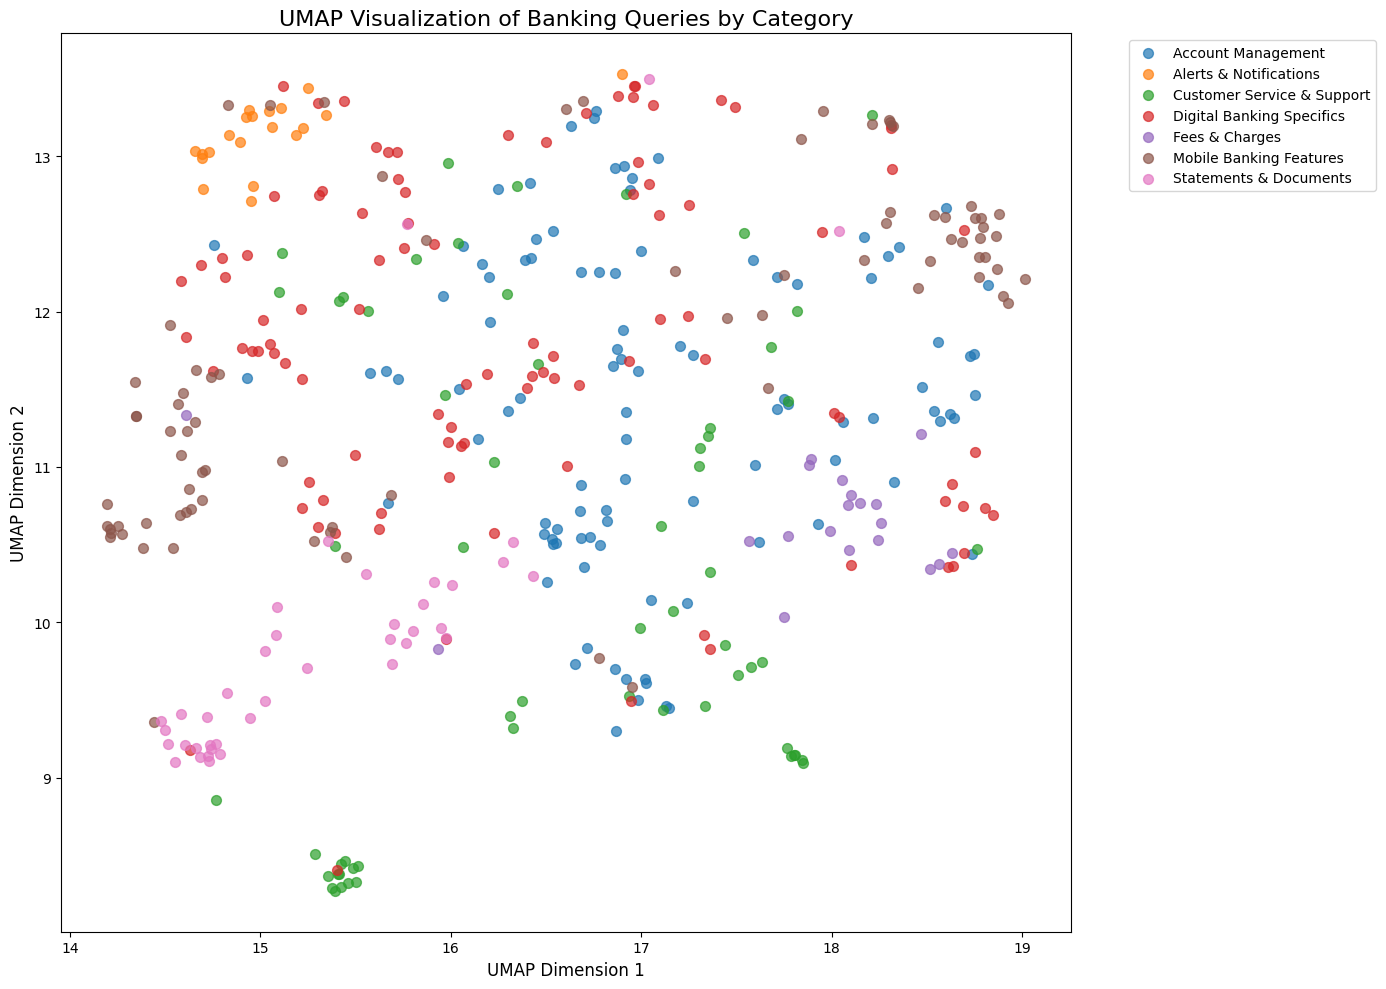

In [31]:
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

reducer = umap.UMAP(n_components=2,
                    n_neighbors=40,  # Lower for more local structure, higher for more global
                    min_dist=0.01,    # Lower for tighter clusters
                    metric='cosine',  # Better for text embeddings
                    random_state=42)  # For reproducibility

umap_embeddings = reducer.fit_transform(embeddings)

banking_df['UMAP_X'] = umap_embeddings[:, 0]
banking_df['UMAP_Y'] = umap_embeddings[:, 1]

le = LabelEncoder()
banking_df['Category_Code'] = le.fit_transform(banking_df['Category'])

categories = list(zip(le.classes_, range(len(le.classes_))))

plt.figure(figsize=(14, 10))
palette = sns.color_palette("colorblind", len(categories))

for cat_name, cat_code in categories:
    cat_points = banking_df[banking_df['Category_Code'] == cat_code]
    plt.scatter(cat_points['UMAP_X'], cat_points['UMAP_Y'],
                label=cat_name, alpha=0.7, s=50)

plt.title('UMAP Visualization of Banking Queries by Category', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


## New Out-of-topic and In-topic (long winded)

In [32]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# List of non-banking related queries
non_banking_queries = [
    # Entertainment
    "Tell me a joke",
    "What movies are playing this weekend?",
    "Can you recommend a good TV show?",
    "Who won the Super Bowl last year?",
    "What's your favorite song?",

    # Food
    "How do I make chocolate chip cookies?",
    "What's a good pasta recipe?",
    "Where can I find vegan restaurants nearby?",
    "How long should I grill chicken?",
    "What wine pairs well with fish?",

    # Travel
    "What are popular tourist attractions in Paris?",
    "How do I apply for a passport?",
    "What's the best time to visit Japan?",
    "How much does it cost to fly to Australia?",
    "What should I pack for a beach vacation?",

    # Technology
    "How do I fix a slow computer?",
    "What's the best smartphone to buy?",
    "How do I set up a home WiFi network?",
    "What's the difference between RAM and storage?",
    "How do I create a website?",

    # Health
    "How many calories are in an apple?",
    "What exercises are good for back pain?",
    "How much water should I drink daily?",
    "What are symptoms of the flu?",
    "How do I lower my blood pressure naturally?",

    # Education
    "What's the capital of Mongolia?",
    "How do I solve quadratic equations?",
    "Who wrote Pride and Prejudice?",
    "When did World War II end?",
    "How does photosynthesis work?",

    # Weather
    "What's the weather forecast for tomorrow?",
    "Why does it rain?",
    "When is hurricane season?",
    "What causes lightning?",
    "How do meteorologists predict weather?",

    # Random Requests
    "Write me a poem about sunsets",
    "Draw a picture of a cat",
    "Translate 'hello' to Spanish",
    "Can you recommend a good book?",
    "What's the meaning of life?",

    # Personal
    "How tall are you?",
    "What is your name?",
    "Where do you live?",
    "Do you have any siblings?",
    "What's your favorite color?",

    # Absurd
    "Can elephants jump?",
    "Why is the sky blue?",
    "How many golf balls would fit in a school bus?",
    "If a tree falls in a forest and no one is around, does it make a sound?",
    "What would happen if the sun disappeared?"
]


In [33]:
# List of detailed in-topic banking queries that are realistic customer questions
detailed_banking_queries = [
    # International Transfers
    "My mom needs to send money overseas. How do I send a wire to Singapore?",
    "I need to transfer $5000 to my daughter studying in London. What's the fastest way to do this?",
    "What information do I need to send money to my cousin's bank account in Mexico?",
    "Are there any special requirements for wiring money to India? My parents live there.",
    "I want to help my brother buy a house in Australia. What's the maximum amount I can wire in one transaction?",

    # Card Issues
    "My debit card isn't working at certain stores but works at others. What could be the problem?",
    "I'll be in Europe for 3 weeks next month. Do I need to notify you before using my card there?",
    "My teenager keeps overdrafting their account. Can I set spending limits on their debit card?",
    "Someone charged $500 to my card at a store I've never been to. How do I dispute this?",
    "I dropped my card in water and now the chip doesn't work. Can I get a replacement without changing my card number?",

    # Account Management
    "My husband passed away last month. How do I get his name removed from our joint checking account?",
    "I'm getting married next month. What's the process for adding my fiancé to my accounts?",
    "I'm moving to a different state. Do I need to close my account and open a new one?",
    "My driver's license is expired but I have a passport. Can I use that to make account changes in person?",
    "I want to set up a separate account just for my side business. What's the best option?",

    # Mobile/Online Banking
    "The face recognition on my banking app stopped working after I got new glasses. How do I fix this?",
    "I just got a new phone but I can't remember my password to set up the banking app. What should I do?",
    "When I try to log in to online banking, it says my account is locked. I haven't tried logging in for weeks. Why is this happening?",
    "I'm trying to deposit a check through the app but keep getting an error message saying 'image unclear'. I've tried 5 times already.",
    "My grandmother doesn't have a smartphone but wants to check her balance regularly. What are her options besides coming to a branch?",

    # Loans and Mortgages
    "My property tax went up and now my mortgage payment increased by $200. Can you explain why this happened?",
    "I've been paying extra on my mortgage principal. How can I see how this has affected my payoff date?",
    "We're expecting our first baby and want to buy a house before she arrives. How quickly can we get pre-approved for a mortgage?",
    "My credit score improved significantly since I got my car loan. Can I refinance to get a better interest rate?",
    "I inherited some money and want to pay off a chunk of my student loan. Will there be any penalties for a large payment?",

    # Savings and Investments
    "I'm saving for my child's college education. She's 5 now. What account would give me the best tax advantages?",
    "The interest rate on my CD is about to expire. Current rates are lower now. What are my options?",
    "I'm turning 65 next year and need to start planning retirement withdrawals. How do I set up regular transfers from my IRA to checking?",
    "My company doesn't offer a 401(k). What retirement accounts can I open as a self-employed person?",
    "I have $25,000 sitting in my checking account earning nothing. What's a safe option with better returns but still accessible if needed?",

    # Fees and Charges
    "I was charged a $34 overdraft fee but I have overdraft protection set up. Why did this happen?",
    "I see a $12 monthly maintenance fee on my account. I thought this was waived with direct deposit?",
    "There's a $45 wire transfer fee on my statement but I never sent a wire. How do I get this reversed?",
    "I made 7 withdrawals from my savings account this month and got hit with an excessive withdrawal fee. Can this be waived once?",
    "Why am I being charged ATM fees when using my card at grocery store cashback? I thought that was free.",

    # Security Concerns
    "I got a text supposedly from the bank asking me to verify a purchase, but I'm not sure if it's legitimate. How can I tell?",
    "Someone keeps trying to reset my password. I've gotten 5 security codes in the past hour. What should I do?",
    "I think someone has my account information. I'm seeing small $1-2 charges from companies I don't recognize. How do I secure my account?",
    "I accidentally clicked a link in an email claiming to be from your bank. What steps should I take to protect my account?",
    "My wallet was stolen with my ID and debit card. I already reported the card, but can someone access my accounts with my ID?",

    # Specific Banking Features
    "I need to set up an alert when my balance drops below $500, but only for my checking account, not savings. How do I do this?",
    "I'm trying to use Zelle to pay my landlord but it says his email isn't registered. What other options do I have for quick payments?",
    "Can I schedule a recurring transfer that happens on the 15th and 30th of each month, or only weekly/monthly?",
    "I set up paperless statements but still received a paper statement in the mail. How long does it take for the change to take effect?",
    "How do I view checks I've written after they've cleared? I need copies for tax purposes.",

    # Business Banking
    "I just hired my first employee. How do I set up direct deposit for their paycheck?",
    "My small business is growing and we're receiving more checks. What's the best way to deposit multiple checks daily without visiting a branch?",
    "I need separate accounts to track expenses for different business projects. Can I have multiple business checking accounts linked together?",
    "What information do I need to provide to accept credit card payments for my business through your merchant services?",
    "As a nonprofit organization, are we eligible for reduced banking fees? What documentation do we need to provide?"
]

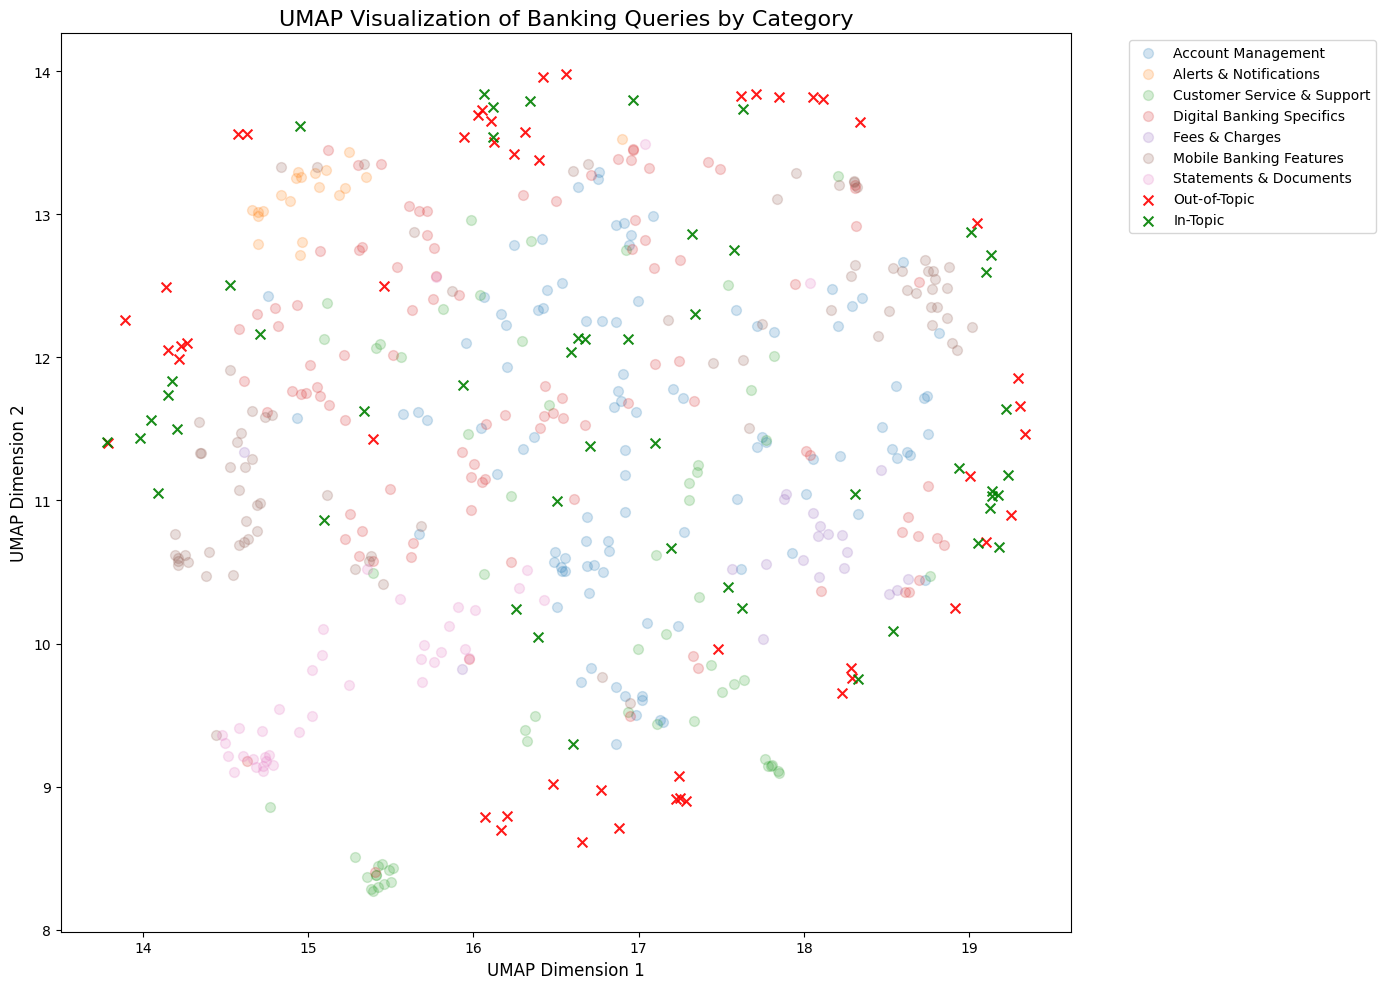

In [34]:

reducer = umap.UMAP(n_components=2,
                    n_neighbors=40,  # Lower for more local structure, higher for more global
                    min_dist=0.01,    # Lower for tighter clusters
                    metric='cosine',  # Better for text embeddings
                    random_state=42)  # For reproducibility

umap_embeddings = reducer.fit_transform(embeddings)

banking_df['UMAP_X'] = umap_embeddings[:, 0]
banking_df['UMAP_Y'] = umap_embeddings[:, 1]

le = LabelEncoder()
banking_df['Category_Code'] = le.fit_transform(banking_df['Category'])

categories = list(zip(le.classes_, range(len(le.classes_))))

plt.figure(figsize=(14, 10))

palette = sns.color_palette("colorblind", len(categories))

for cat_name, cat_code in categories:
    cat_points = banking_df[banking_df['Category_Code'] == cat_code]
    plt.scatter(cat_points['UMAP_X'], cat_points['UMAP_Y'],
                label=cat_name, alpha=0.2, s=50)


new_embeddings = model.encode(non_banking_queries)
new_umap = reducer.transform(new_embeddings)

# Plot out-of-topic points in red
plt.scatter(new_umap[:, 0], new_umap[:, 1],
            color='red', label='Out-of-Topic',
            alpha=0.9, s=50, marker='x')


new_embeddings2 = model.encode(detailed_banking_queries)
new_umap2 = reducer.transform(new_embeddings2)

# Plot out-of-topic points in red
plt.scatter(new_umap2[:, 0], new_umap2[:, 1],
            color='green', label='In-Topic',
            alpha=0.9, s=50, marker='x')



plt.title('UMAP Visualization of Banking Queries by Category', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

## Silhouette

Testing UMAP: components=2, neighbors=20, min_dist=0.01
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 2, 'silhouette_score': np.float32(0.3612488)}
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 3, 'silhouette_score': np.float32(0.397193)}
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 6, 'silhouette_score': np.float32(0.40745988)}
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 7, 'silhouette_score': np.float32(0.4230441)}
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 8, 'silhouette_score': np.float32(0.4372542)}
New best: {'n_components': 2, 'n_neighbors': 20, 'min_dist': 0.01, 'n_clusters': 10, 'silhouette_score': np.float32(0.4497067)}
Testing UMAP: components=2, neighbors=20, min_dist=0.05
Testing UMAP: components=2, neighbors=20, min_dist=0.1
Testing UMAP: components=2, neighbors=30, min_dist=0.01
New best: {'n_

Text(0, 0.5, 'Silhouette Score')

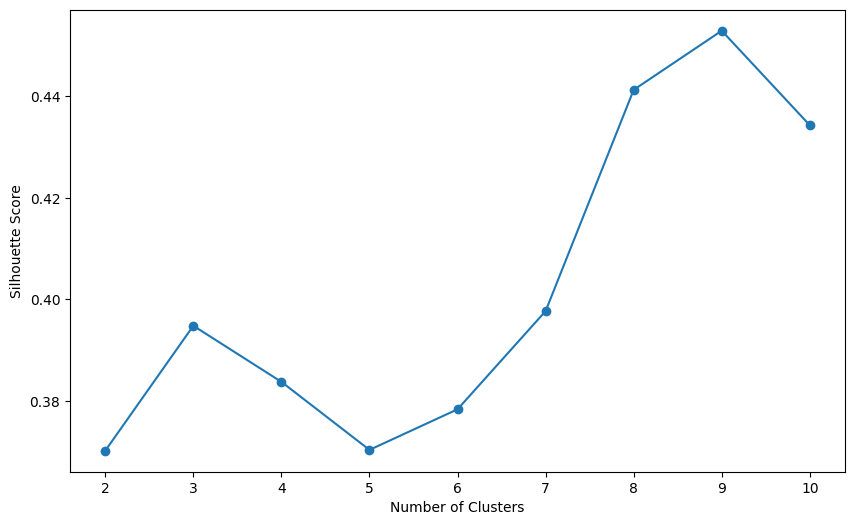

In [35]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm  # For progress tracking
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.metrics.pairwise import cosine_similarity


# Create a grid of parameters to try
n_components_list = [2, 4, 6]  # UMAP dimensions to try
n_neighbors_list = [20, 30, 40]  # UMAP neighborhood size
min_dist_list = [0.01, 0.05, 0.1]   # UMAP minimum distance
n_clusters_list = range(2, 11)           # KMeans cluster counts to try

# Initialize tracking of best parameters
best_score = -1
best_params = {}
results = []

# Loop through parameter combinations
for n_components in n_components_list:
    for n_neighbors in n_neighbors_list:
        for min_dist in min_dist_list:
            print(f"Testing UMAP: components={n_components}, neighbors={n_neighbors}, min_dist={min_dist}")

            # Create and fit UMAP
            reducer = umap.UMAP(
                n_components=n_components,
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                metric='cosine',
                random_state=42
            )

            # Transform data
            umap_embeddings = reducer.fit_transform(embeddings)

            # Try different numbers of clusters
            for n_clusters in n_clusters_list:
                # Fit KMeans
                kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                clusters = kmeans.fit_predict(umap_embeddings)

                # Calculate silhouette score
                try:
                    score = silhouette_score(umap_embeddings, clusters)

                    # Store result
                    result = {
                        'n_components': n_components,
                        'n_neighbors': n_neighbors,
                        'min_dist': min_dist,
                        'n_clusters': n_clusters,
                        'silhouette_score': score
                    }
                    results.append(result)

                    # Update best if better
                    if score > best_score:
                        best_score = score
                        best_params = result.copy()
                        print(f"New best: {best_params}")
                except:
                    # If silhouette score fails (e.g., only one cluster with points)
                    print(f"Silhouette calculation failed for n_clusters={n_clusters}")
                    continue

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display best parameters
print("\nBest Parameters:")
print(f"UMAP components: {best_params['n_components']}")
print(f"UMAP n_neighbors: {best_params['n_neighbors']}")
print(f"UMAP min_dist: {best_params['min_dist']}")
print(f"Number of clusters: {best_params['n_clusters']}")
print(f"Silhouette score: {best_params['silhouette_score']}")

# Plot silhouette scores for the best UMAP configuration
best_umap = results_df[
    (results_df['n_components'] == best_params['n_components']) &
    (results_df['n_neighbors'] == best_params['n_neighbors']) &
    (results_df['min_dist'] == best_params['min_dist'])
]

plt.figure(figsize=(10, 6))
plt.plot(best_umap['n_clusters'], best_umap['silhouette_score'], 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


## Evaluate

In [88]:

# Get cluster centers (average of embeddings in each cluster)
def get_cluster_centers(embeddings, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    centers = {}

    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        if len(cluster_indices) > 0:
            centers[i] = np.mean(embeddings[cluster_indices], axis=0)

    return centers

# Function to predict if a query is in-topic based on distance to nearest cluster center
def predict_topic(query, threshold=0.5, pca=None):

    query_embedding = model.encode([query])

    # Apply PCA if requested
    if pca is not None:
        query_embedding = pca.transform(query_embedding)

    # Find the closest cluster center
    max_similarity = -1
    closest_cluster = -1

    for cluster_id, center in cluster_centers.items():
        center_reshaped = center.reshape(1, -1)
        similarity = cosine_similarity(query_embedding, center_reshaped)[0][0]

        if similarity > max_similarity:
            max_similarity = similarity
            closest_cluster = cluster_id

    # Determine if in-topic based on similarity threshold
    is_in_topic = max_similarity >= threshold

    return {
        'query': query,
        'closest_cluster': closest_cluster,
        'similarity': max_similarity,
        'is_in_topic': is_in_topic
    }

# Evaluate multiple thresholds and calculate AUC
def evaluate_thresholds(in_topic_queries, out_topic_queries, pca=None):

    # Get predictions for all queries
    all_queries = in_topic_queries + out_topic_queries
    true_labels = np.array([1] * len(in_topic_queries) + [0] * len(out_topic_queries))  # 1 = in-topic, 0 = out-of-topic

    # Get similarity scores
    similarities = []
    print("Calculating similarities...")
    for query in tqdm(all_queries):
        result = predict_topic(query, threshold=0, pca=pca)
        similarities.append(result['similarity'])

    # Convert to array
    similarities = np.array(similarities)

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, similarities)
    roc_auc = auc(fpr, tpr)

    # Calculate metrics at different thresholds
    results = {
        'thresholds': thresholds,
        'precision': [],
        'recall': [],
        'accuracy': [],
        'in_topic_accuracy': [],
        'out_topic_accuracy': []
    }

    for threshold in thresholds:
        predictions = similarities >= threshold
        # Calculate metrics
        TP = np.sum((predictions == 1) & (true_labels == 1))
        TN = np.sum((predictions == 0) & (true_labels == 0))
        FP = np.sum((predictions == 1) & (true_labels == 0))
        FN = np.sum((predictions == 0) & (true_labels == 1))

        # Handle division by zero
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        accuracy = (TP + TN) / len(true_labels)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['accuracy'].append(accuracy)

    results['fpr'] = fpr
    results['tpr'] = tpr
    results['auc'] = roc_auc

    return results

# Plot the evaluation results
def plot_results(results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot metrics vs threshold
    ax1.plot(results['thresholds'], results['accuracy'], 'b-', label='Accuracy')
    ax1.plot(results['thresholds'], results['precision'], 'g-', label='Precision')
    ax1.plot(results['thresholds'], results['recall'], 'r-', label='Recall')

    acceptable_fpr = results['thresholds'][results['fpr']<0.05][-1]

    ax1.axvline(x=acceptable_fpr, color='purple', linestyle='--',
           label=f'Threshold for FPR<5%={acceptable_fpr:.2f}')

    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Score')
    ax1.set_title('Metrics vs Threshold')
    ax1.legend()
    ax1.grid(True)

    # Plot ROC curve
    ax2.plot(results['fpr'], results['tpr'], 'b-', label=f'ROC Curve (AUC = {results["auc"]:.3f})')
    ax2.plot([0, 1], [0, 1], 'k--', label='Random')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
    return acceptable_fpr

# Analyze errors at the best threshold
def analyze_errors(in_topic_queries, out_topic_queries, threshold, pca=None):
    false_positives = []  # Out-of-topic classified as in-topic
    false_negatives = []  # In-topic classified as out-of-topic

    # Check in-topic queries
    print("Analyzing in-topic queries...")
    for query in tqdm(in_topic_queries):
        result = predict_topic(query, threshold=threshold, pca=pca)
        if not result['is_in_topic']:
            false_negatives.append({
                'query': query,
                'similarity': result['similarity'],
                'closest_cluster': result['closest_cluster']
            })

    # Check out-of-topic queries
    print("Analyzing out-of-topic queries...")
    for query in tqdm(out_topic_queries):
        result = predict_topic(query, threshold=threshold, pca=pca)
        if result['is_in_topic']:
            false_positives.append({
                'query': query,
                'similarity': result['similarity'],
                'closest_cluster': result['closest_cluster']
            })

    return {
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }


In [109]:
from sklearn.metrics import roc_curve, auc

reducer = umap.UMAP(n_components=2,
                    n_neighbors=30,  # Lower for more local structure, higher for more global
                    min_dist=0.01,    # Lower for tighter clusters
                    metric='cosine',  # Better for text embeddings
                    random_state=42)  # For reproducibility
umap_embeddings = reducer.fit_transform(embeddings)

kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(umap_embeddings)

cluster_centers = get_cluster_centers(embeddings, clusters)
print(f"Found {len(cluster_centers)} cluster centers")



Found 9 cluster centers


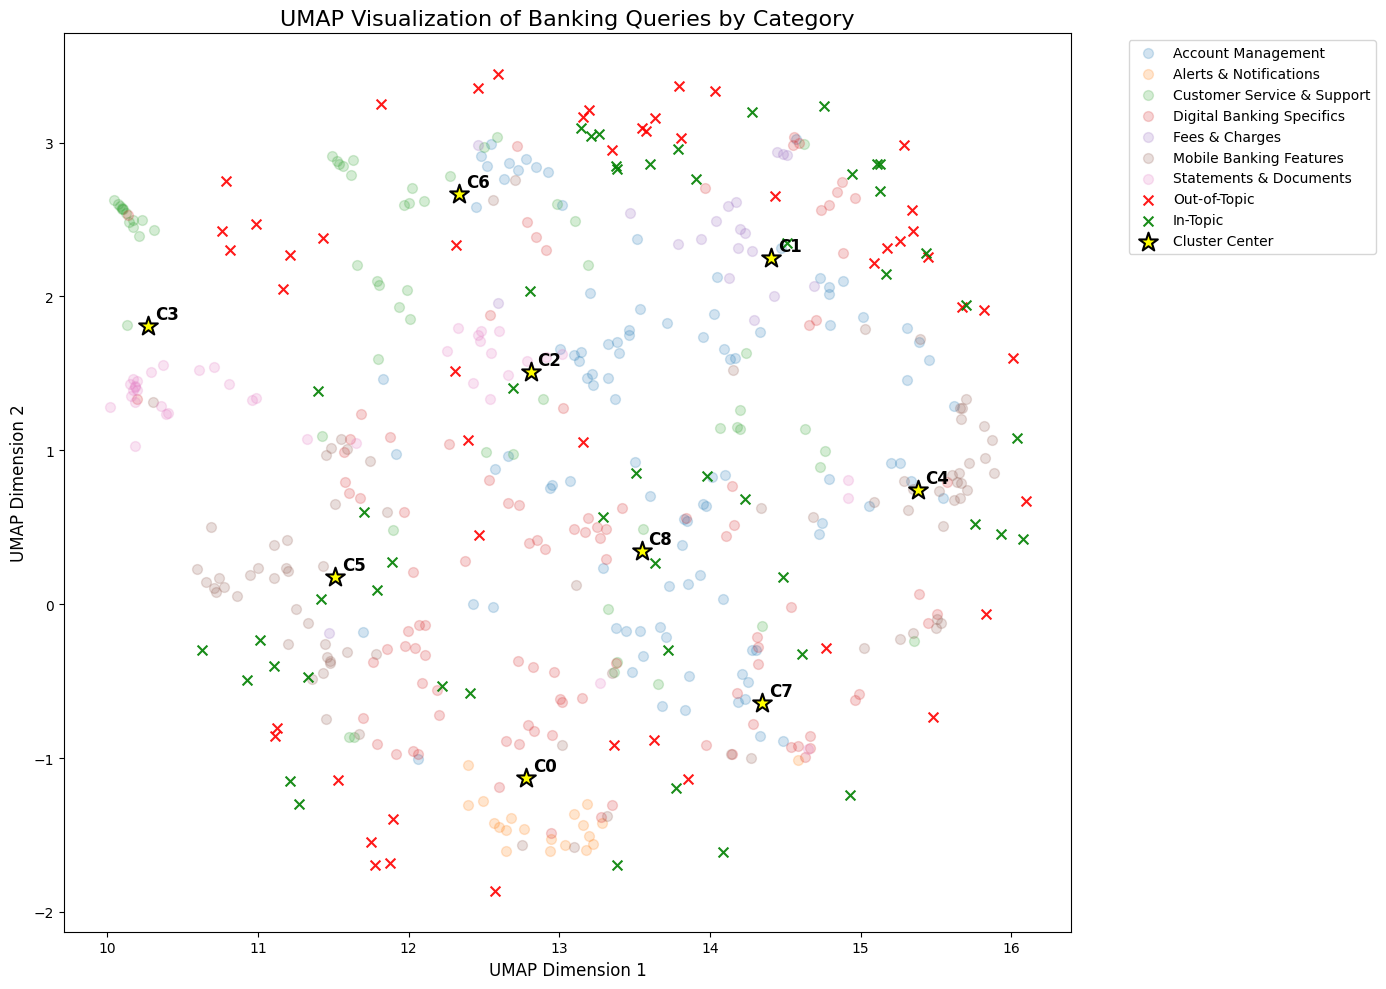

In [130]:
banking_df['UMAP_X'] = umap_embeddings[:, 0]
banking_df['UMAP_Y'] = umap_embeddings[:, 1]

le = LabelEncoder()
banking_df['Category_Code'] = le.fit_transform(banking_df['Category'])

categories = list(zip(le.classes_, range(len(le.classes_))))

plt.figure(figsize=(14, 10))

palette = sns.color_palette("colorblind", len(categories))

for cat_name, cat_code in categories:
    cat_points = banking_df[banking_df['Category_Code'] == cat_code]
    plt.scatter(cat_points['UMAP_X'], cat_points['UMAP_Y'],
                label=cat_name, alpha=0.2, s=50)


new_embeddings = model.encode(non_banking_queries)
new_umap = reducer.transform(new_embeddings)

# Plot out-of-topic points in red
plt.scatter(new_umap[:, 0], new_umap[:, 1],
            color='red', label='Out-of-Topic',
            alpha=0.9, s=50, marker='x')


new_embeddings2 = model.encode(detailed_banking_queries)
new_umap2 = reducer.transform(new_embeddings2)

# Plot out-of-topic points in red
plt.scatter(new_umap2[:, 0], new_umap2[:, 1],
            color='green', label='In-Topic',
            alpha=0.9, s=50, marker='x')


# Plot KMeans cluster centers
for i, center in enumerate(kmeans.cluster_centers_):
    plt.scatter(
        center[0], center[1],
        color='yellow',
        edgecolors='black',
        label='Cluster Center' if i == 0 else "",  # Only add label once
        alpha=1.0,
        s=200,  # Larger size
        marker='*',  # Star marker
        linewidth=1.5
    )

    # Annotate each cluster center with its ID
    plt.annotate(
        f'C{i}',  # Text to display
        (center[0], center[1]),
        xytext=(5, 5),  # Small offset
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color='black'
    )


plt.title('UMAP Visualization of Banking Queries by Category', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

In [ ]:

results = evaluate_thresholds(detailed_banking_queries, non_banking_queries)
acceptable_fpr = plot_results(results)


In [92]:
d = analyze_errors(detailed_banking_queries, non_banking_queries, acceptable_fpr)

Analyzing in-topic queries...


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


Analyzing out-of-topic queries...


100%|██████████| 50/50 [00:10<00:00,  4.77it/s]


In [94]:
d['false_positives']

[{'query': 'How do I apply for a passport?',
  'similarity': np.float32(0.62421936),
  'closest_cluster': 2},
 {'query': 'How do I create a website?',
  'similarity': np.float32(0.6078718),
  'closest_cluster': 7}]

In [95]:
len(d['false_positives'])/len(non_banking_queries)

0.04

In [96]:
d['false_negatives']

[{'query': 'My mom needs to send money overseas. How do I send a wire to Singapore?',
  'similarity': np.float32(0.58034444),
  'closest_cluster': 8},
 {'query': "I need to transfer $5000 to my daughter studying in London. What's the fastest way to do this?",
  'similarity': np.float32(0.5557468),
  'closest_cluster': 1},
 {'query': 'My teenager keeps overdrafting their account. Can I set spending limits on their debit card?',
  'similarity': np.float32(0.58362216),
  'closest_cluster': 5},
 {'query': 'My husband passed away last month. How do I get his name removed from our joint checking account?',
  'similarity': np.float32(0.59166014),
  'closest_cluster': 8},
 {'query': 'My property tax went up and now my mortgage payment increased by $200. Can you explain why this happened?',
  'similarity': np.float32(0.4928751),
  'closest_cluster': 2},
 {'query': "We're expecting our first baby and want to buy a house before she arrives. How quickly can we get pre-approved for a mortgage?",
  

In [97]:
len(d['false_negatives'])/len(detailed_banking_queries)

0.26